In [1]:
%matplotlib inline

import glob
import os
import re

import matplotlib.image as mpimg
import pandas as pd
import PIL
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import skimage.morphology as morph
from skimage import io, color
from PIL import Image
import skimage

## Funciones de utilidad 

In [2]:
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    elif(mode=='yuv' or mode=='YUV'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2YUV)
    elif(mode=='hsv' or mode=='HSV'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2HSV)
    elif(mode=='lab' or mode=='LAB'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2LAB)
    else:
        return None

def detect_edge(image, umbral_min, umbral_max, titulo = "Imagen original",canal = ""):
    image_with_edges = cv2.Canny(image, umbral_min, umbral_max)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
    fig.suptitle(canal, fontsize=15)
    ax1.set_title(titulo)
    ax1.imshow(image, cmap='gray')
    ax2.set_title('Bordes')
    ax2.imshow(image_with_edges, cmap='gray')

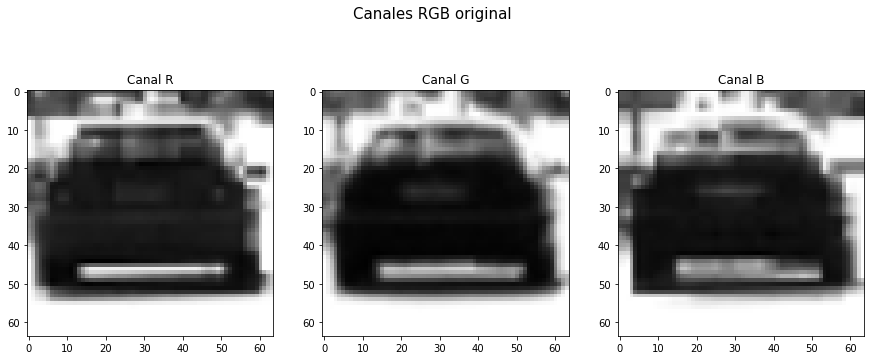

In [3]:
image_path = '50.png'
img_rgb = img_read('../data/vehicles/'+image_path)

#Modelo RGB
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales RGB original', fontsize=15)
ax1.set_title('Canal R')
ax1.imshow(img_R, cmap='gray')
ax2.set_title('Canal G')
ax2.imshow(img_G, cmap='gray')
ax3.set_title('Canal B')
ax3.imshow(img_B, cmap='gray')

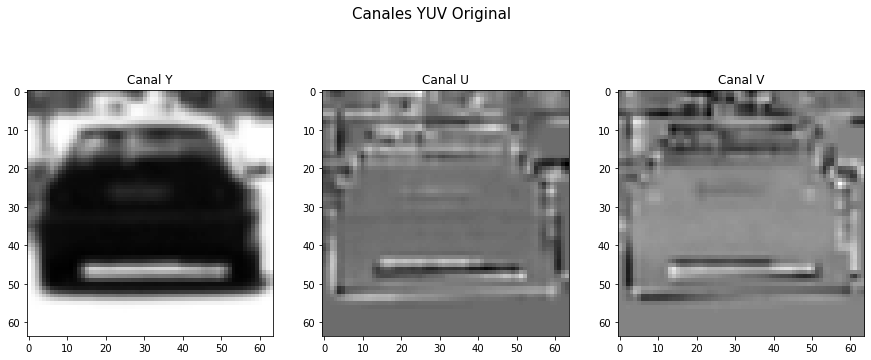

In [4]:
img_yuv = img_read('../data/vehicles/'+image_path, 'yuv')

#Modelo YUV

img_Y = img_yuv[:,:,0]
img_U =  img_yuv[:,:,1]
img_V = img_yuv[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales YUV Original', fontsize=15)
ax1.set_title('Canal Y')
ax1.imshow(img_Y, cmap='gray')
ax2.set_title('Canal U')
ax2.imshow(img_U, cmap='gray')
ax3.set_title('Canal V')
ax3.imshow(img_V, cmap='gray')

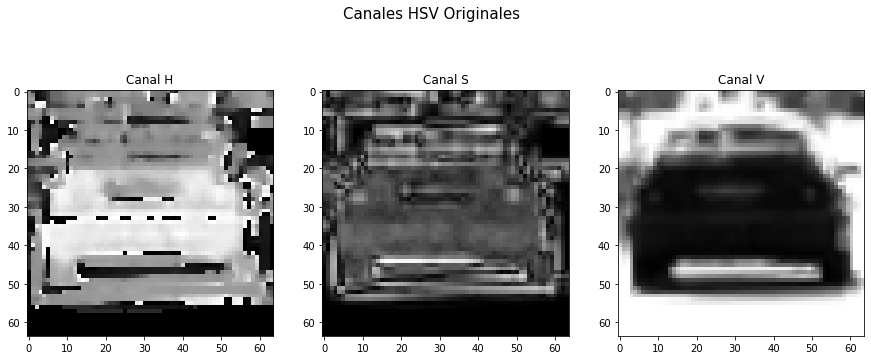

In [5]:
img_hsv = img_read('../data/vehicles/'+image_path, 'hsv')

#Modelo HSV

img_H = img_hsv[:,:,0]
img_S =  img_hsv[:,:,1]
img_V = img_hsv[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales HSV Originales', fontsize=15)
ax1.set_title('Canal H')
ax1.imshow(img_H, cmap='gray')
ax2.set_title('Canal S')
ax2.imshow(img_S, cmap='gray')
ax3.set_title('Canal V')
ax3.imshow(img_V, cmap='gray')

### En esta prueba, los canales G(RGB) y Y(YUV) presentan el mayor contraste y muestran mejor el contorno del vehículo respecto al fondo. Se descartan los canales H y S del espectro HSV, pues el contorno del vehículo se mezcla con el fondo y no hay una distinción clara del objeto, al igual que los canales U y V del espectro YUV.

### A continuación se les aplica un kernel de acentuación a las imagenes en estos dos canales para ver si mejora su contraste y definición.

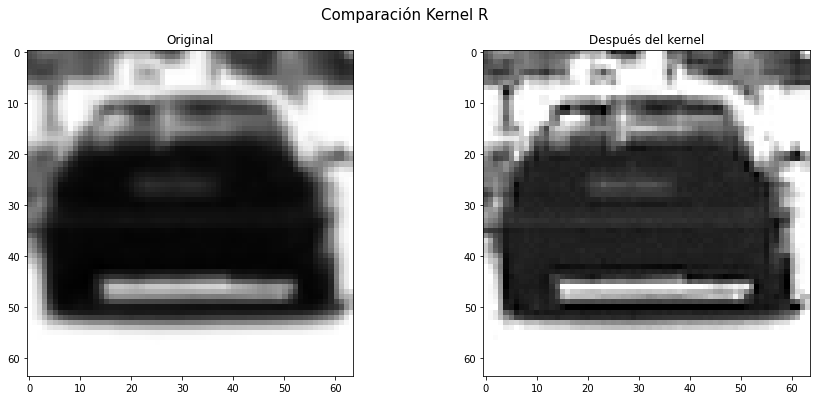

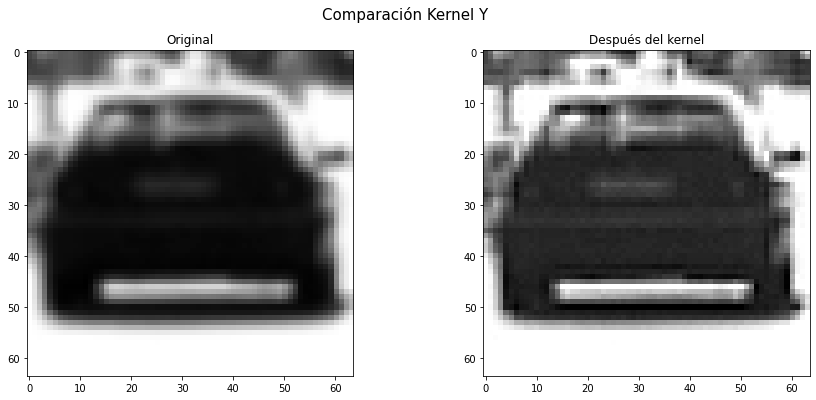

In [6]:
sharp_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
img_G_sharp = cv2.filter2D(img_G, -1, sharp_kernel)
img_Y_sharp = cv2.filter2D(img_Y, -1, sharp_kernel)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))

fig.suptitle('Comparación Kernel R', fontsize=15)
ax1.set_title('Original')
ax1.imshow(img_G, cmap='gray')
ax2.set_title('Después del kernel')
ax2.imshow(img_G_sharp, cmap='gray')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))

fig.suptitle('Comparación Kernel Y', fontsize=15)
ax1.set_title('Original')
ax1.imshow(img_Y, cmap='gray')
ax2.set_title('Después del kernel')
ax2.imshow(img_Y_sharp, cmap='gray')

#### Al aplicar el kernel de acentuación, se resaltan detalles que pueden ayudar a distinguir el auto, como la matrícula y las luces o reflectores. 


#### Se encierra esta funcionalidad bajo una función para su posterior uso.

In [7]:
def sharp_image(img):
    sharp_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
    img = cv2.filter2D(img_G, -1, sharp_kernel)
    return img

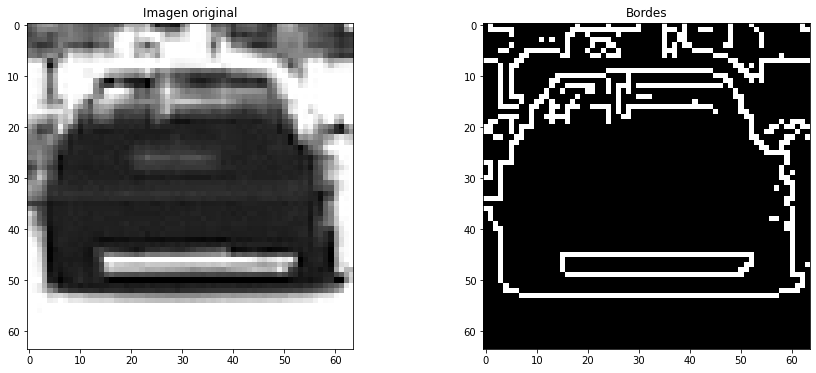

In [8]:
detect_edge(img_G_sharp, 200, 210)